# Atividade 5
-Escolha uma base de classificação e compare os classificadores Logistic Regression e KNN do scikit-learn.

-Use pelo menos duas formas de avaliação e as repita pelo menos 10 vezes.

-Calcule a média das repetições de cada avaliação.

## Bibliotecas

In [1]:
# Biliotecas para dados
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
# Bibliotecas para aprendizado de Maquina Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Base de dados

In [3]:
# Importar Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00611/accelerometer.csv')
df

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121
...,...,...,...,...,...
152995,3,100,1.051,0.090,-0.262
152996,3,100,0.918,0.039,-0.129
152997,3,100,1.156,-0.094,-0.227
152998,3,100,0.934,0.203,-0.172


In [4]:
# Abrir as chaves 
df.keys

<bound method NDFrame.keys of         wconfid  pctid      x      y      z
0             1     20  1.004  0.090 -0.125
1             1     20  1.004 -0.043 -0.125
2             1     20  0.969  0.090 -0.121
3             1     20  0.973 -0.012 -0.137
4             1     20  1.000 -0.016 -0.121
...         ...    ...    ...    ...    ...
152995        3    100  1.051  0.090 -0.262
152996        3    100  0.918  0.039 -0.129
152997        3    100  1.156 -0.094 -0.227
152998        3    100  0.934  0.203 -0.172
152999        3    100  1.199 -0.176  0.109

[153000 rows x 5 columns]>

In [5]:
# Quantidade dos dados
df.shape

(153000, 5)

In [6]:
# Divisão em Dados e Target
X, y = df.pctid, df.wconfid

X.shape, y.shape, set(y) # temos 3 variaveis

((153000,), (153000,), {1, 2, 3})

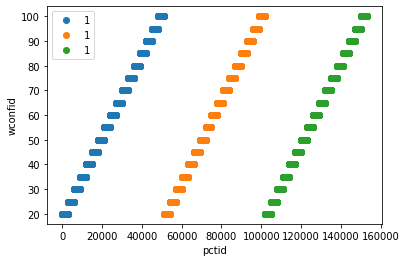

In [7]:
# Plotar gráfico
plt.xlabel(f"pctid")
plt.ylabel(f"wconfid")
for k in set(y):
    plt.plot(X[:][y==k], "o", label=f"{y[k]}")
plt.legend()
plt.show()

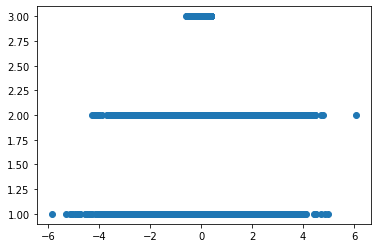

In [8]:
# Pltar valores selecionados
X2 = df["z"].values 
y2 = df["wconfid"].values

plt.scatter(X2,y2)
plt.show()

In [9]:
# Função Reshape
X3 = X2.reshape(-1,1)
y3 = y2.reshape(-1,1)

## Regressão Logística

In [10]:
# Sem Padronização
parametros = {'penalty': ['none','none','none','none','none','none','none','none','none','none']}

modelo = GridSearchCV(LogisticRegression(), parametros, 
scoring=make_scorer(mean_squared_error, greather_is_better=False,
squared=False))

scores = cross_validate(modelo, X3, y3, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {-sempad}")

c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metri

[-1.14162194 -1.11684956 -1.07715432 -1.06743232 -1.0769571 ]
Sem padronização: 1.0960030501392435


In [11]:
# Com Padronização
parametros = {'penalty': ['l2','l2','l2','l2','l2','l2','l2','l2','l2','l2']}

GridSearchLR = GridSearchCV(LogisticRegression(), parametros, 
scoring='neg_mean_squared_error')
modelo = Pipeline([
    ("padronizacao", StandardScaler()),
    ("gsknn", GridSearchLR)
])

scores = cross_validate(modelo, X3, y3, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
compad = np.mean(scores['test_score'])
print(f"Com padronização: {(-compad)}")

c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversio

[-1.14162194 -1.11684956 -1.11607388 -1.07085574 -1.0769571 ]
Com padronização: 1.1044716464731852


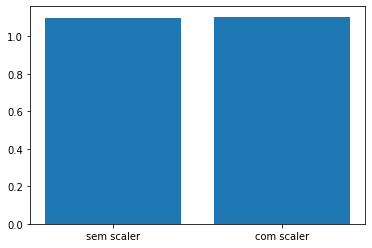

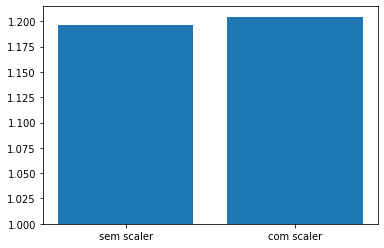

In [12]:
# Gráfico em colunas
colunas = ["sem scaler", "com scaler"]
plt.bar(colunas, [-sempad,-compad])
plt.show()

plt.bar(colunas, np.array([-sempad,-compad])-0.9, bottom=1)
plt.show()

## KNN - Vizinhos

In [13]:
# Sem Padronização
parametros = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

modelo = GridSearchCV(KNeighborsRegressor(), parametros, 
scoring=make_scorer(mean_squared_error, greather_is_better=False,
squared=False))

scores = cross_validate(modelo, X3, y3, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
sempad = np.mean(scores['test_score'])
print(f"Sem padronização: {-sempad}")


c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
TypeError: mean_squared_error() got an unexpected keyword argument 'greather_is_better'

  warnings.warn(
c:\Users\mathe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn

[-0.         -0.82204114 -0.99766066 -1.730333   -2.        ]
Sem padronização: 1.110006960070461


In [14]:
# Com Padronização
parametros = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

GridSearchKNN = GridSearchCV(KNeighborsRegressor(), parametros, 
scoring='neg_mean_squared_error')
modelo = Pipeline([
    ("padronizacao", StandardScaler()),
    ("gsknn", GridSearchKNN)
])

scores = cross_validate(modelo, X3, y3, scoring=make_scorer
(mean_squared_error, greater_is_better=False, squared=False))
print(scores['test_score'])
compad = np.mean(scores['test_score'])
print(f"Com padronização: {(-compad)}")

[-0.05029976 -0.83141564 -0.99766066 -1.72979938 -2.        ]
Com padronização: 1.1218350860875332


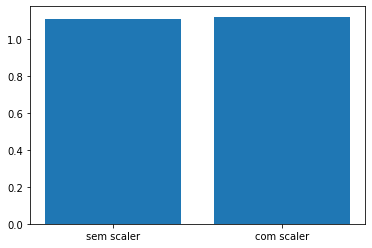

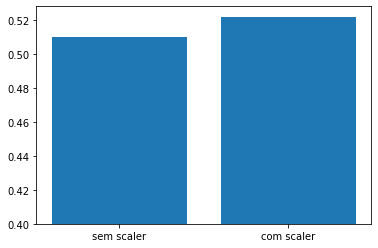

In [17]:
# Gráfico em colunas
colunas = ["sem scaler", "com scaler"]
plt.bar(colunas, [-sempad,-compad])
plt.show()

plt.bar(colunas, np.array([-sempad,-compad])-1.0, bottom=0.4)
plt.show()